In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk

import numpy as np

from TESSCroMo.tesscromo import TESSTargetPixelModeler

In [28]:
search_result = lk.search_targetpixelfile('LHS 3844', mission='TESS', )
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,410153553,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,410153553,0.0
2,TESS Sector 27,2020,SPOC,20,410153553,0.0
3,TESS Sector 27,2020,SPOC,120,410153553,0.0
4,TESS Sector 27,2020,TESS-SPOC,600,410153553,0.0
5,TESS Sector 28,2020,SPOC,20,410153553,0.0
6,TESS Sector 28,2020,SPOC,120,410153553,0.0
7,TESS Sector 28,2020,TESS-SPOC,600,410153553,0.0
8,TESS Sector 67,2023,SPOC,20,410153553,0.0


In [29]:
#search = lk.search_tesscut('TOI 2406')
search = lk.search_tesscut('LHS 3844')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESScut,1426,LHS 3844,0.0
1,TESS Sector 27,2020,TESScut,475,LHS 3844,0.0
2,TESS Sector 28,2020,TESScut,475,LHS 3844,0.0
3,TESS Sector 67,2023,TESScut,158,LHS 3844,0.0
4,TESS Sector 68,2023,TESScut,158,LHS 3844,0.0


In [30]:
tpf = search[4].download(cutout_size=(15,15))

In [31]:
tpf.interact()

In [32]:
TESSCrowd = TESSTargetPixelModeler(tpf)

(0.07335105491497772, 0.12973638964712808)

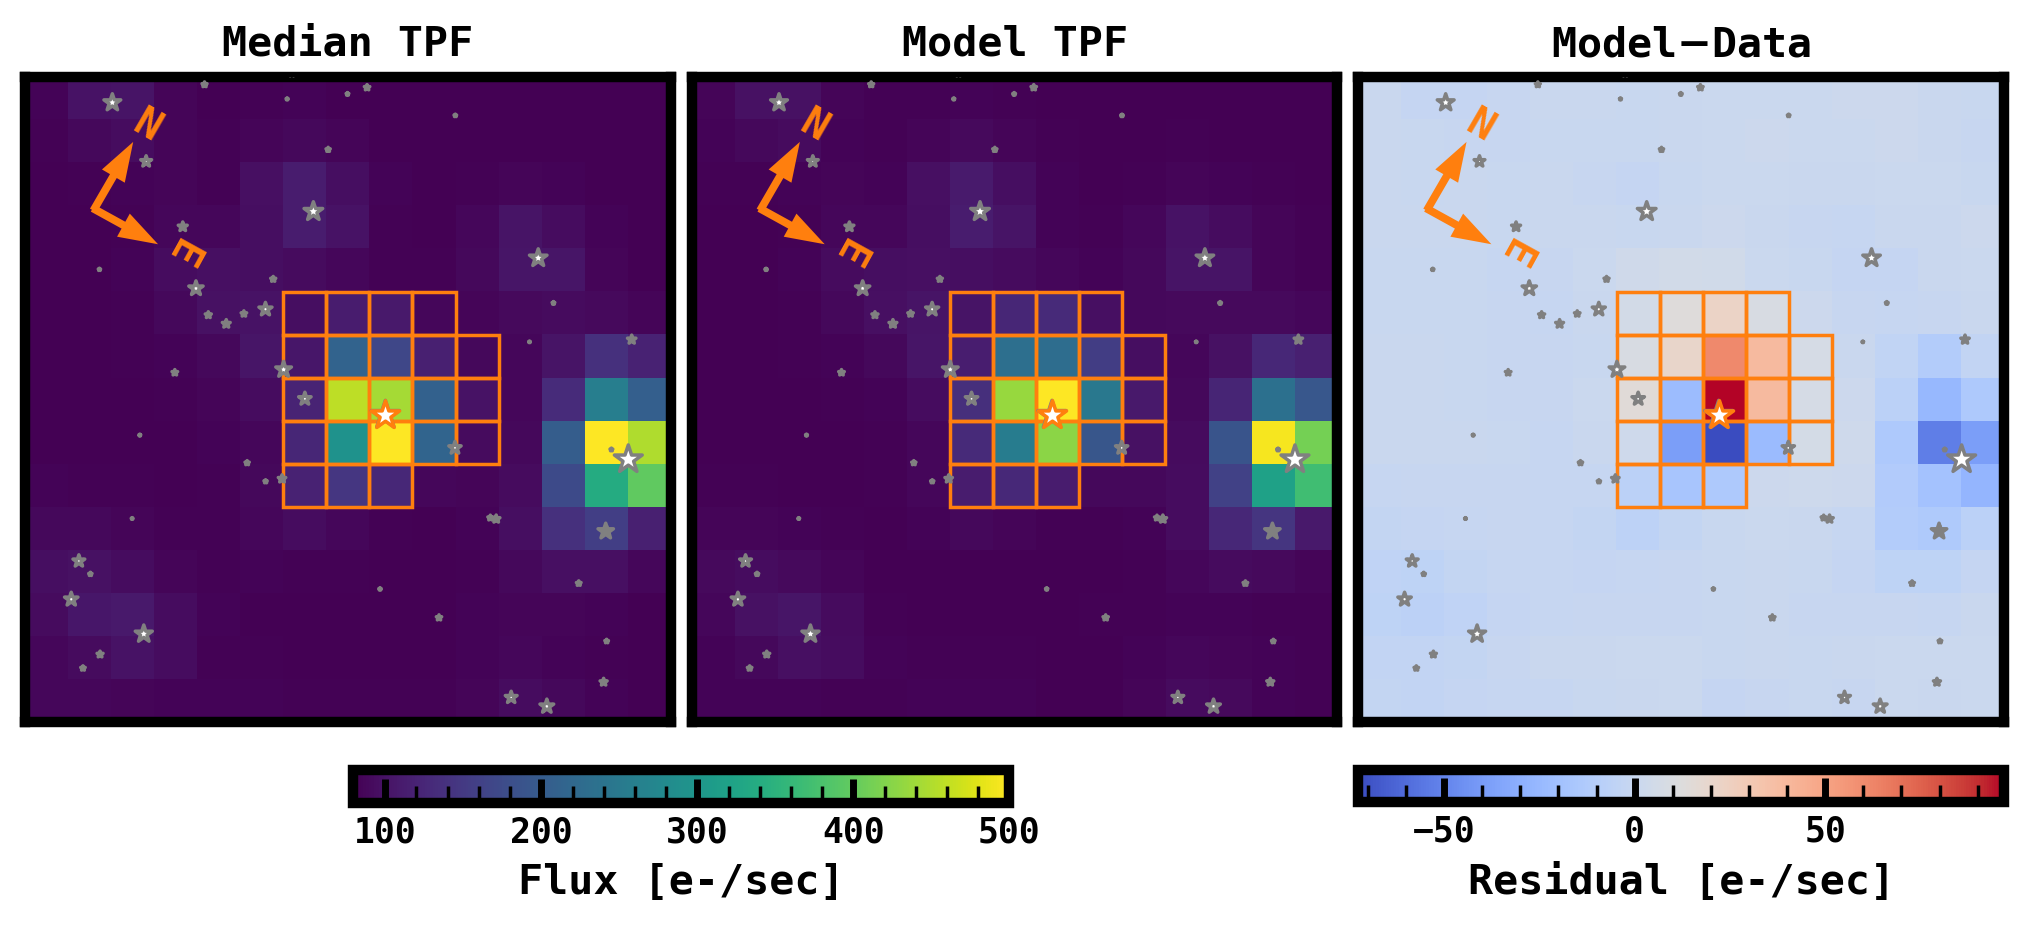

In [33]:
dx, dy = TESSCrowd.estimate_med_offset()
TESSCrowd.plot_tpf_model(logscale=False, vmax=500);

dx, dy

Text(0.5, 1.0, 'CroMo Background')

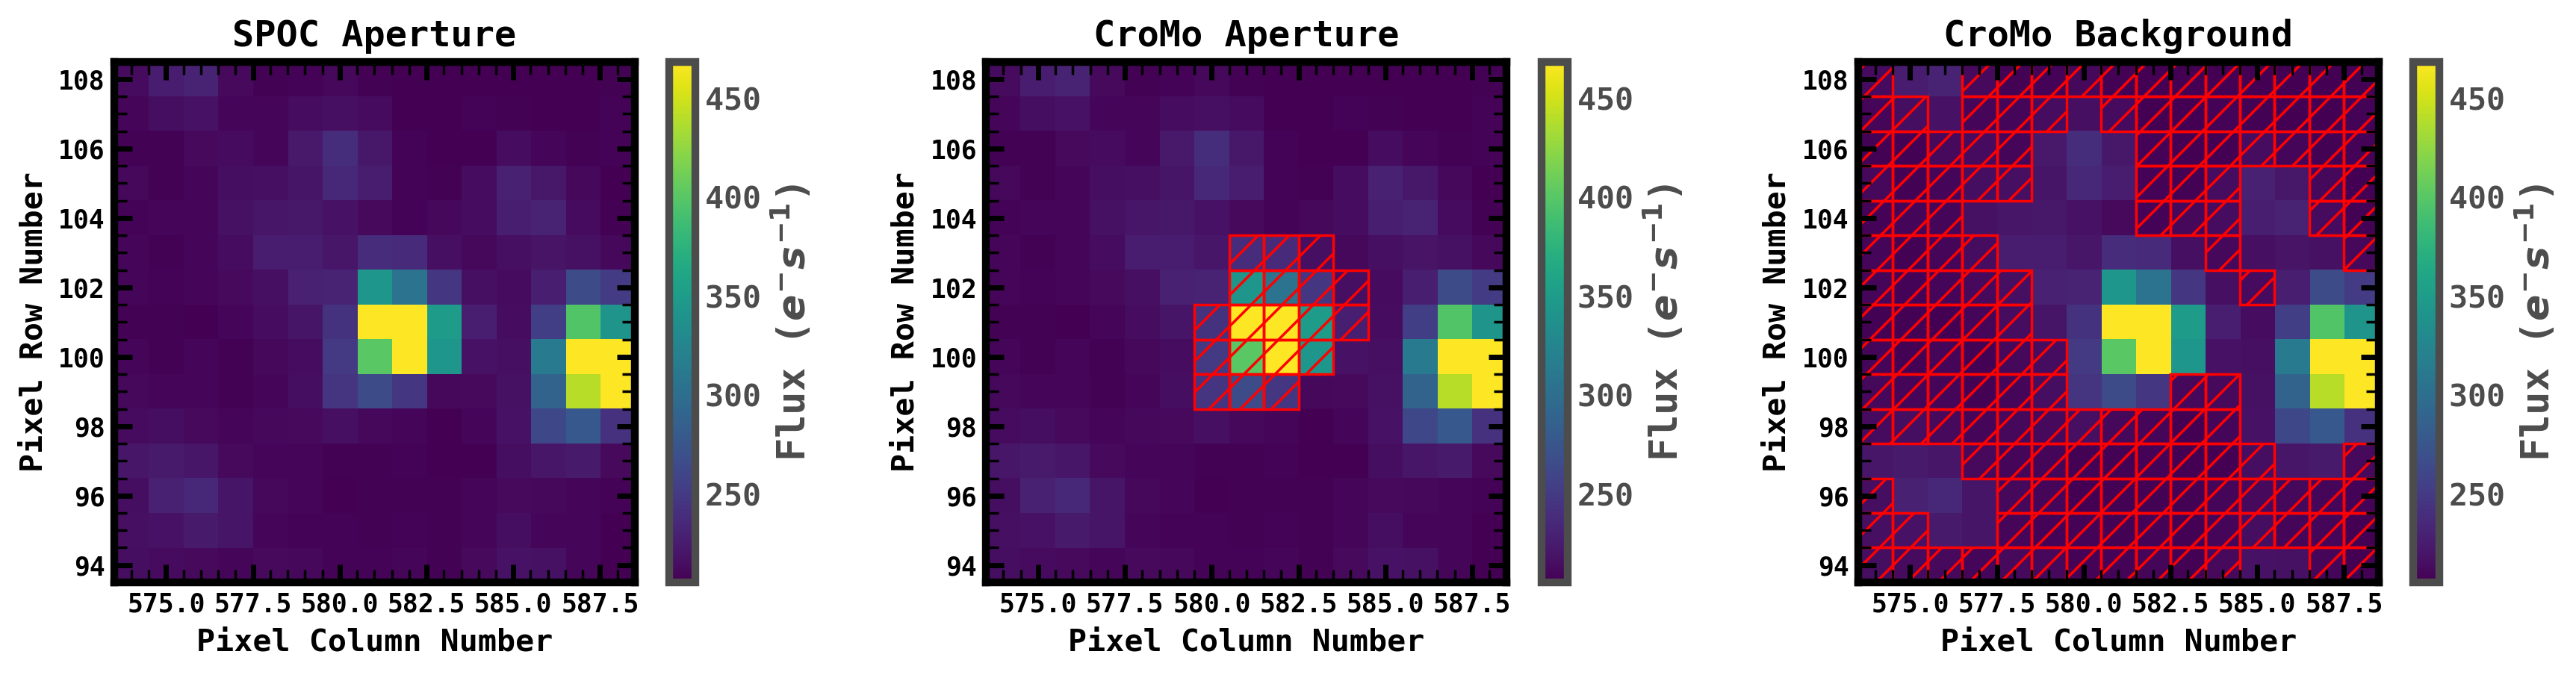

In [34]:
# Calculate the Optimal Aperture for SAP Photometry, Also returns an aperture with background-dominated pixels
# Note: The TPF is already background subtracted, so the background mask is very inaccurate (i.e., non-existant)


cromo_source_aperture, cromo_bkg_aperture = TESSCrowd.get_optimal_aperture(dx=dx, dy=dy, snr_limit=1.5)

fig, axes = plt.subplots(1, 3, figsize=(14,3.5), constrained_layout=True)
tpf.plot(ax=axes[0], aperture_mask=tpf.pipeline_mask, )
tpf.plot(ax=axes[1], aperture_mask=cromo_source_aperture)
tpf.plot(ax=axes[2], aperture_mask=cromo_bkg_aperture)

axes[0].set_title('SPOC Aperture', fontsize=14)
axes[1].set_title('CroMo Aperture', fontsize=14)
axes[2].set_title('CroMo Background', fontsize=14)



In [35]:
#np.shape(sapflux)
#len(sapflux), sum(np.isnan(sapflux))


capflux, _, _ = TESSCrowd.get_cap_flux_timeseries(cromo_source_aperture)

/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:66: RuntimeWarning: divide by zero encountered in true_divide
  A = np.vstack(1./err.ravel()**2.)*A
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:67: RuntimeWarning: divide by zero encountered in true_divide
  data = np.vstack(1./err.ravel()**2.)*data
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:67: RuntimeWarning: invalid value encountered in multiply
  data = np.vstack(1./err.ravel()**2.)*data
 43%|███████████████▌                    | 4988/11532 [00:03<00:04, 1345.57it/s]/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:516: RuntimeWarning: divide by zero encountered in double_scalars
  sap_flux_decrowd = (sap_flux_bkg_sub - contam_flux)/flux_frac
 45%|████████████████                    | 5139/11532 [00:03<00:04, 1337.67it/s]


ValueError: zero-size array to reduction operation maximum which has no identity

In [36]:
# Get PRF Light Curve
lcfits = TESSCrowd.get_prf_flux_timeseries(progress=True)
psf_flux, zero_point_flux, bkg_flux, dx_t, dy_t = lcfits


100%|███████████████████████████████████| 11532/11532 [00:01<00:00, 8166.88it/s]


In [11]:


# Calculate a SAP Light Curve with PRF data Products
sap_flux = [np.sum(f*cromo_source_aperture)  for f in TESSCrowd.tpf_flux]


# Decrowd the aperture photometry
#sap_flux_decrowd = (sap_flux - np.median(sap_flux)*crowding['crowdsap']) / crowding['flfrcsap']

np.shape(sap_flux)


(10716,)

In [37]:
len(capflux), sum(np.isnan(sap_flux))



NameError: name 'capflux' is not defined

In [38]:
lc_search = lk.search_lightcurve('LHS 3844', mission='TESS', sector=TESSCrowd.tpf.sector )
lc_search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 68,2023,SPOC,20,410153553,0.0
1,TESS Sector 68,2023,SPOC,120,410153553,0.0
2,TESS Sector 68,2023,TESS-SPOC,200,410153553,0.0
3,TESS Sector 68,2023,QLP,200,410153553,0.0


In [39]:
lc_spoc = lc_search[2].download()
lc_qlp=lc_search[3].download()

lc_spoc.columns

<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>

In [40]:
spoc_mask = np.isin(TESSCrowd.cadenceno, lc_spoc['cadenceno'][lc_spoc['quality']==0]) 

len(lc_spoc), len(spoc_mask), len(psf_flux)

#plt.plot(lc_spoc['time'].value, TESSCrowd.time.value[spoc_mask])

len(lc_spoc['time'].value), len(TESSCrowd.time.value)

(11532, 11532)

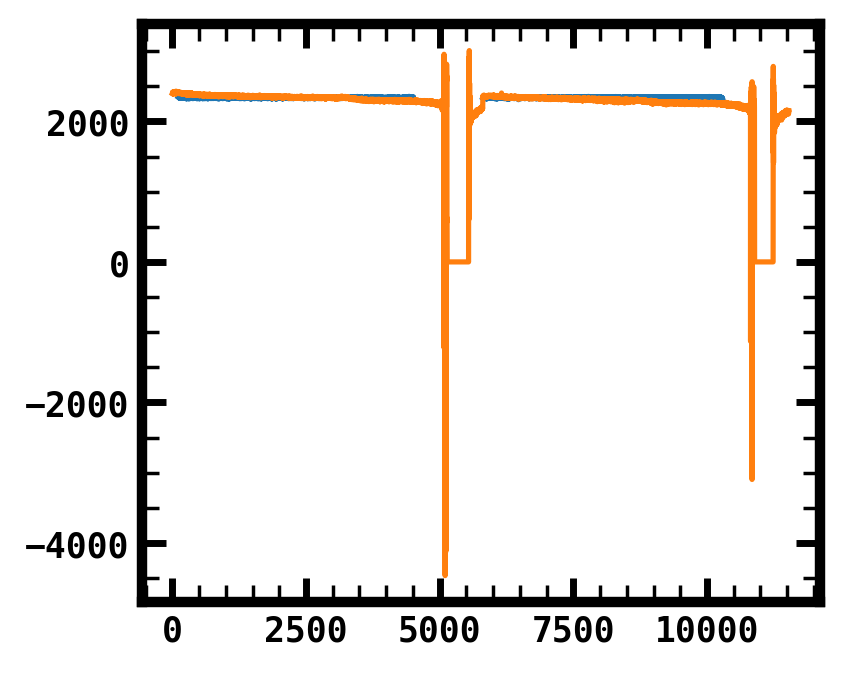

In [43]:
plt.plot(lc_spoc['flux'].value)
plt.plot(psf_flux)

In [41]:
## Plot the Light Curve Products:


print(np.median(bkg_flux) )


print(sum(np.isnan(psf_flux)) )

systematics=[psf_flux[~np.isnan(psf_flux)], np.array(capflux)[~np.isnan(psf_flux)], dx_t[~np.isnan(psf_flux)],
             dy_t[~np.isnan(psf_flux)],  zero_point_flux[~np.isnan(psf_flux)]]
labels=['prf_flux','sap_flux','dx', 'dy', 'zero_point_flux']

fig, axes = plt.subplots(len(systematics), 1, figsize=(7, 1.5*len(systematics)), sharex=True)

for s in range(len(systematics)):

    axes[s].plot(TESSCrowd.time.value[~np.isnan(psf_flux)], systematics[s], '.')
    axes[s].set_ylabel(labels[s])


axes[-1].set_xlabel('Time [BTJD]')
axes[0].set_title('Systematics and Raw PRF Lightcurve Outputs')

plt.tight_layout()

79.27694227868473
0


NameError: name 'capflux' is not defined

In [ ]:
capflux

In [ ]:

#plot(TESSCrowd.time.value, systematics[s], lw=1)

plt.plot(TESSCrowd.time.value,norm( capflux) )
plt.plot(TESSCrowd.time.value, norm(psf_flux) )


IndexError: boolean index did not match indexed array along dimension 0; dimension is 17868 but corresponding boolean dimension is 10716

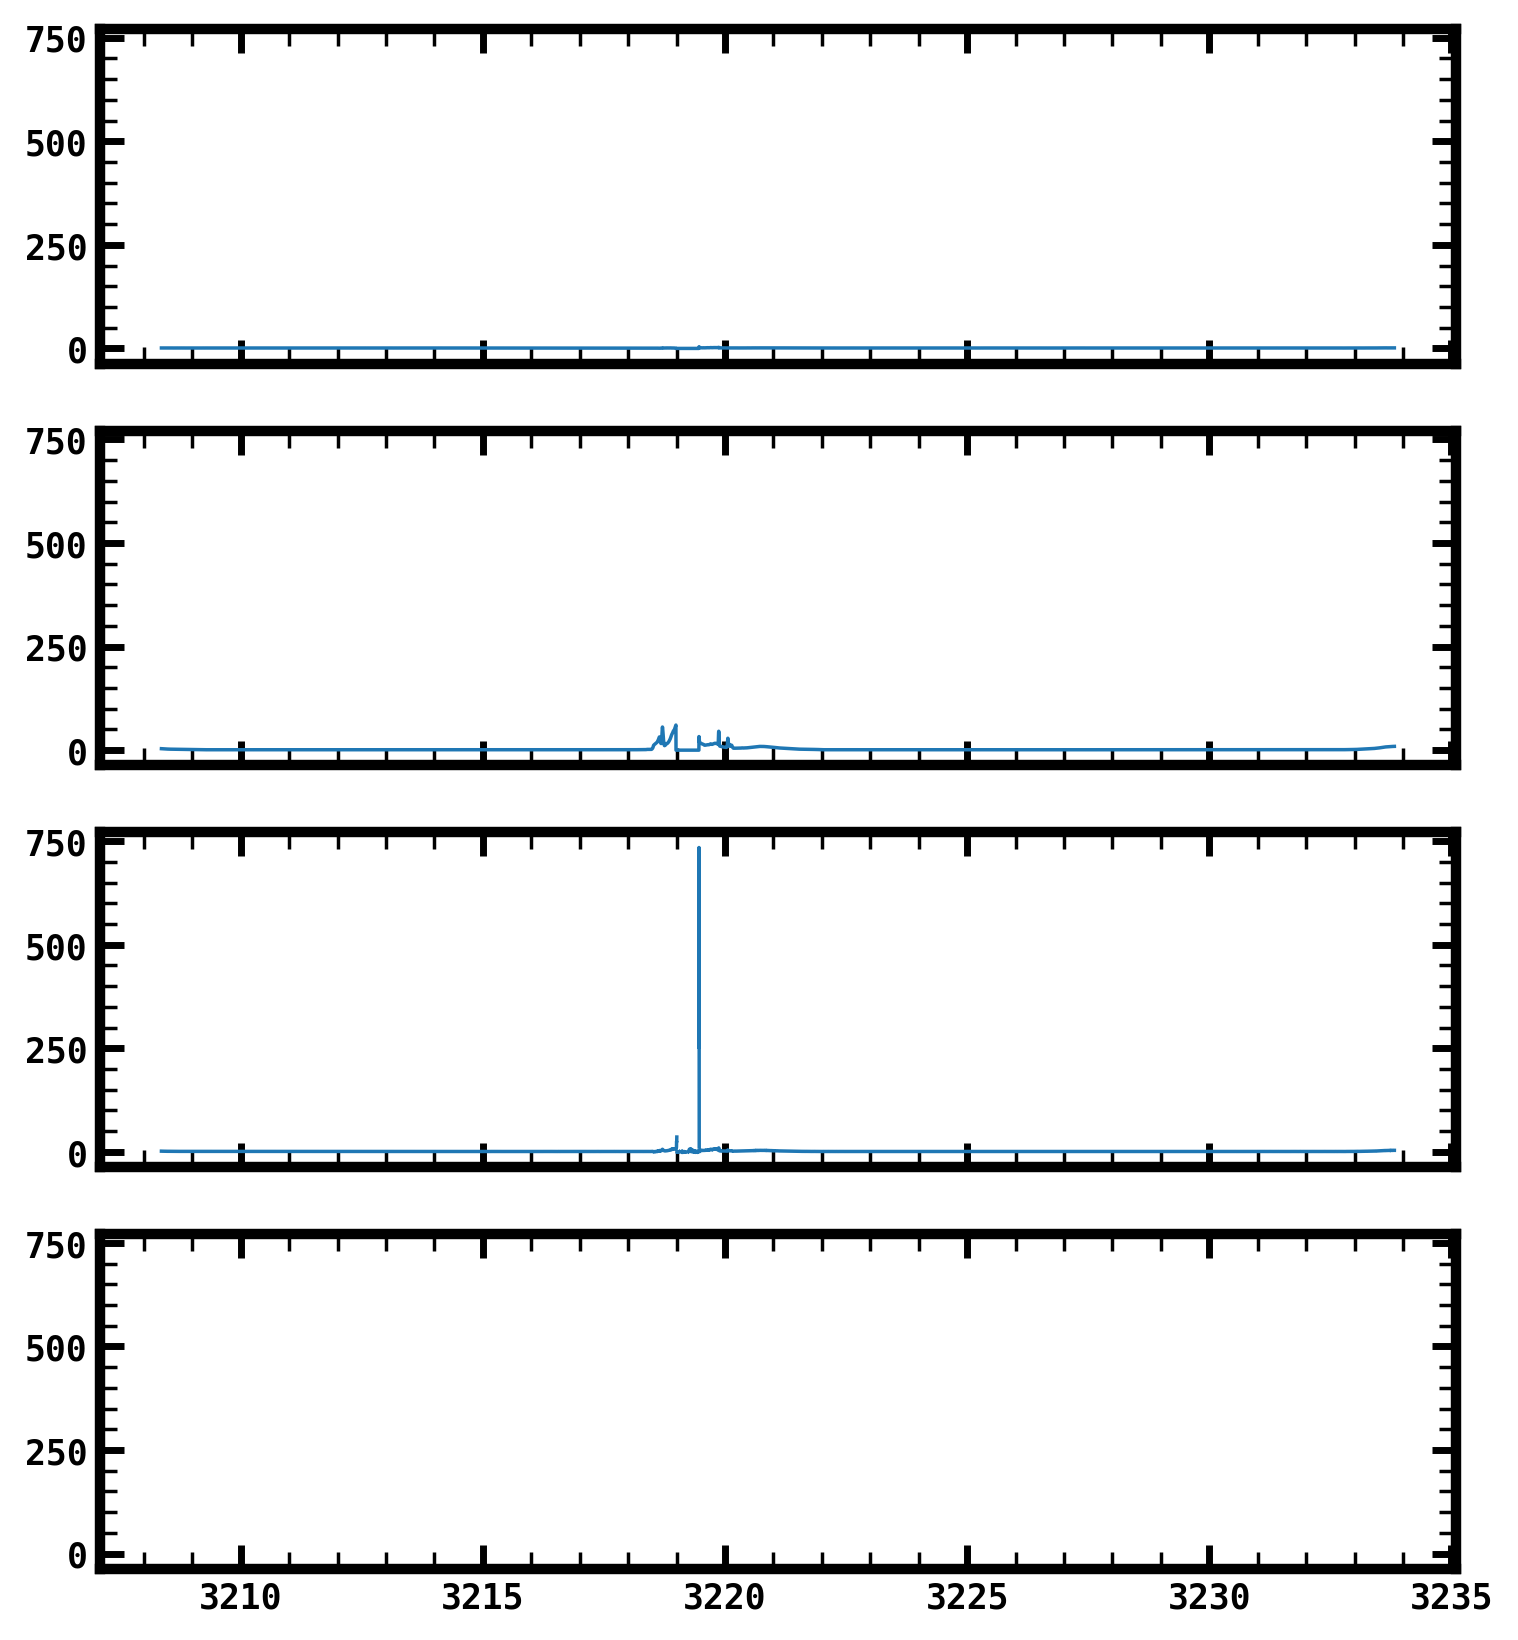

In [20]:
# Compare to Other Light Curves

def norm(x):
    return x/np.nanmedian(x)

def point_scatter(x):
    return np.median(np.abs(np.diff(norm(x))) )


#print(spoc_mask['flux'].value)


fig, axes = plt.subplots(4,1, figsize=(7,8), sharey=True, sharex=True)

P=3.0766e10

axes[0].plot(TESSCrowd.time.value%P, norm(psf_flux), '-', lw=1)
#axes[1].plot(TESSCrowd.time.value%P, norm(capflux), '-', lw=1)
axes[1].plot(TESSCrowd.time.value%P, norm(sap_flux), '-', lw=1)
axes[2].plot(lc_spoc.time.value%P, norm(lc_spoc.flux), '-', lw=1)
axes[3].plot(lc_elnr.time.value[spoc_mask], lc_elnr.flux[spoc_mask], '-', lw=1)


axes[0].set_title('CroMo PRF Flux')
axes[1].set_title('CroMo SAP Flux')
axes[2].set_title('TESS-SPOC Corr. Flux')
axes[3].set_title('Eleanor Corr. Flux')


axes[-1].set_xlabel('Time [BTJD]')

#plt.xlim(2491,2494)

plt.tight_layout()


#plt.ylim(0.95, 1.025)
# Print Point to Point Scatter
print('CroMo PRF LC scatter:   ', point_scatter(psf_flux[~np.isnan(psf_flux)]) )
print('CroMo SAP LC scatter:   ', point_scatter(capflux) )
print('SPOC SAP LC scatter:    ', point_scatter(lc_spoc.flux) )
print('Eleanor SAP LC scatter: ', point_scatter(lc_elnr.flux) )

In [21]:
## Correct Systematics with dx, dxy, and bkg/zeropoint flux
from lightkurve.correctors import RegressionCorrector, DesignMatrix


#regressors = np.hstack(np.array([dx_t, dy_t, bkg_flux, zero_point_flux], ))


def light_curve_corrector(systematics, ):

    prf_flux, sap_flux = systematics[0], systematics[1]

    dm = DesignMatrix(np.vstack(systematics[2:]).T)
    dm = dm.pca(4).append_constant()

    X = dm.X

    flux_err = np.ones_like(prf_flux)

    Xw = X.T.dot(X / flux_err[:, None] )
    
    B_prf = np.dot(X.T, prf_flux/flux_err )
    B_sap = np.dot(X.T, sap_flux/flux_err )

    w_prf = np.linalg.solve(Xw, B_prf).T
    w_sap = np.linalg.solve(Xw, B_sap).T
    
    prf_flux_corr = prf_flux/X.dot(w_prf)
    sap_flux_corr = sap_flux/X.dot(w_sap)

    return prf_flux_corr, sap_flux_corr 

#X=dm.X

#flux_err = 5e-4*np.ones_like(psf_flux)
#sigma_w_inv = X.T.dot(X / flux_err[:, None] ** 2)
#B = np.dot(X.T, psf_flux / flux_err ** 2)

#w = np.linalg.solve(sigma_w_inv, B).T

#model_flux = X.dot(w)


#print(sum(np.isnan(systematics)) )

corr_prf, corr_sap = light_curve_corrector( systematics )


#plt.plot(lc_spoc.time.value[~np.isnan(psf_flux)], norm(lc_spoc.flux), '-', lw=1)

plt.plot(TESSCrowd.time.value, corr_prf , '-' )

#plt.plot(TESSCrowd.time.value[spoc_mask], norm(corr_sap[spoc_mask]) - 0.06 )
plt.plot(TESSCrowd.time.value, corr_sap)

NameError: name 'systematics' is not defined

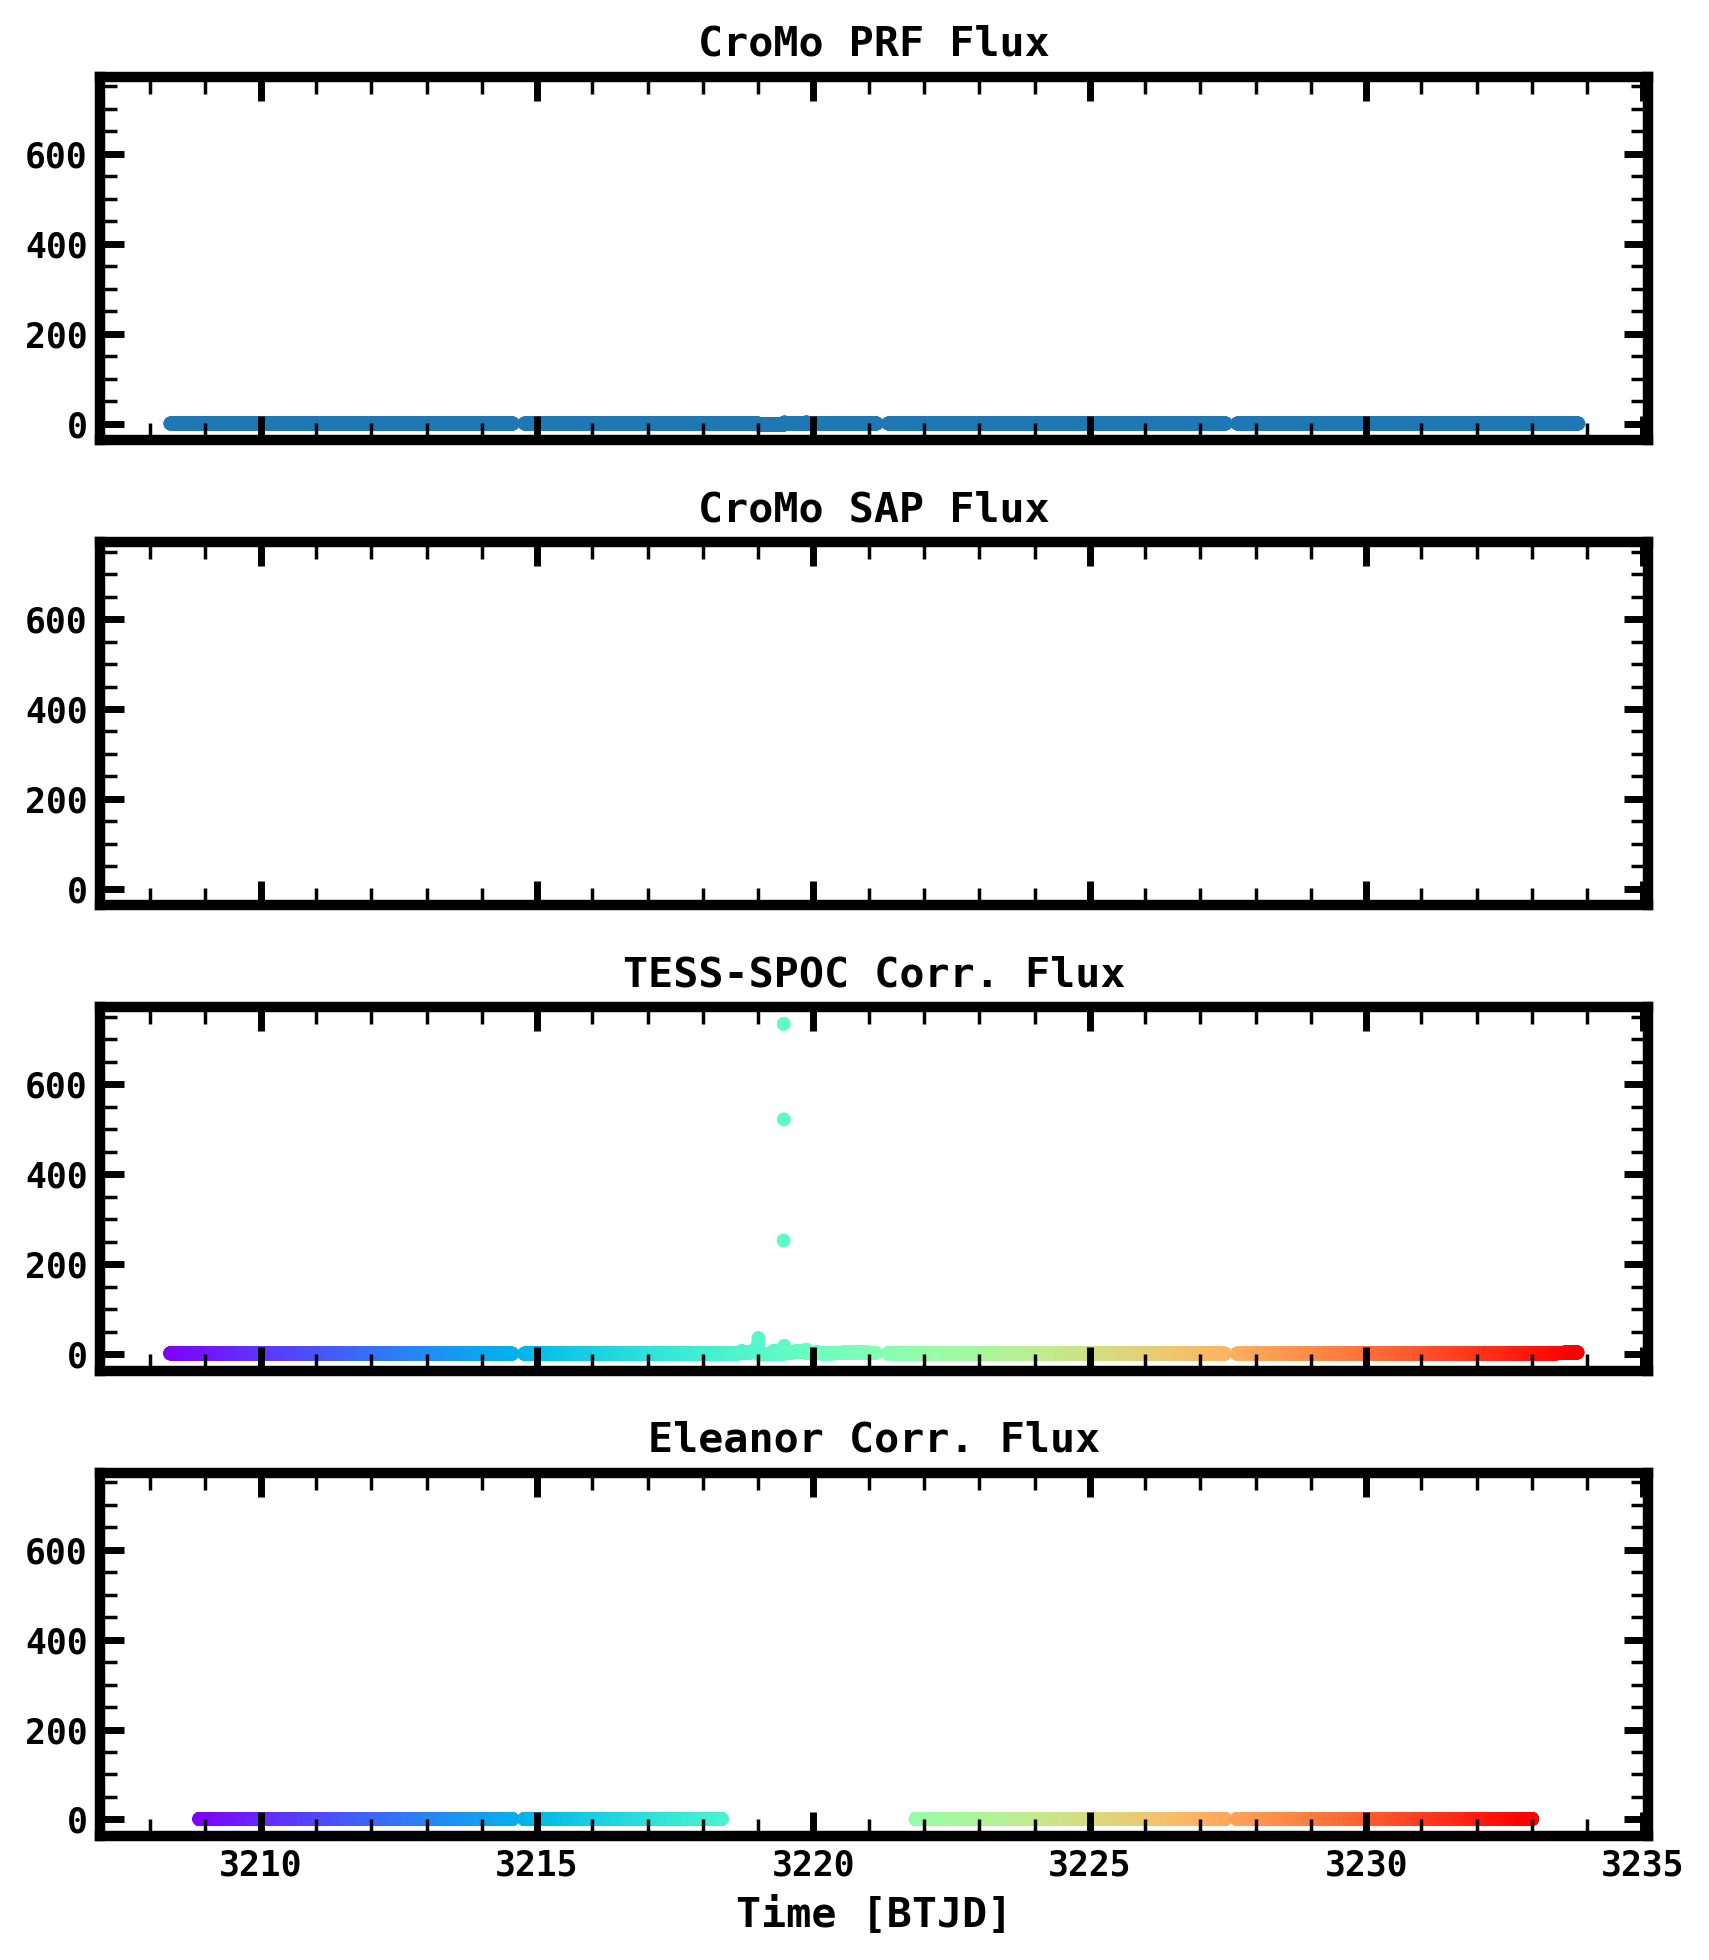

In [27]:
fig, axes = plt.subplots(4,1, figsize=(7,8), sharey=True, sharex=True)

P=6.387597
t0 = 2459530.543507 - 2457000

axes[0].scatter(TESSCrowd.time.value[~np.isnan(psf_flux)], norm(psf_flux), marker='.',  cmap='rainbow') 
#axes[1].scatter(TESSCrowd.time.value[~np.isnan(psf_flux)], norm(corr_sap), marker='.',  cmap='rainbow') 
axes[2].scatter(lc_spoc.time.value, norm(lc_spoc.flux), marker='.', c=lc_spoc.time.value, cmap='rainbow') 
axes[3].scatter(lc_elnr.time.value, norm(lc_elnr.flux), marker='.', c=lc_elnr.time.value, cmap='rainbow') 

axes[0].set_title('CroMo PRF Flux') 
axes[1].set_title('CroMo SAP Flux') 
axes[2].set_title('TESS-SPOC Corr. Flux') 
axes[3].set_title('Eleanor Corr. Flux')

axes[-1].set_xlabel('Time [BTJD]')


#axes[0].set_xlim(-0.45, 0.45)
#axes[0].set_ylim(0.95, 1.05)

plt.tight_layout()

#print('CroMo PRF LC scatter: ',  point_scatter(corr_prf),)
#print('CroMo SAP LC scatter: ',  point_scatter(corr_sap) ) 
#print('SPOC SAP LC scatter: ',   point_scatter(lc_spoc.flux) ) 
#print('Eleanor SAP LC scatter: ',point_scatter(lc_elnr.flux) )

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(7,8), sharey=True, sharex=True)

P=6.387597
t0 = 2459530.543507 - 2457000

axes[0].scatter(lc_spoc.time.value, norm(lc_spoc.flux), marker='.', c='b',) 
axes[0].scatter(TESSCrowd.time.value, norm(corr_prf), marker='.', c='r', ) 

#plt.xlim(-0.25, .5)